# Viscosity solution

In [32]:
from firedrake import *
from firedrake.pyplot import triplot, trisurf, tricontourf
from matplotlib import pyplot as plt

In [40]:
# mesh = IntervalMesh(4, -1, 1)
mesh = RectangleMesh(64, 64, 1, 1)
U = FunctionSpace(mesh, 'CG', 1)

u, v = Function(U), TestFunction(U)

eps = Constant(1)
F = inner(eps*grad(u), grad(v))*dx + inner(sqrt(inner(grad(u), grad(u))), v)*dx - inner(1, v)*dx
bc = DirichletBC(U, 0, 'on_boundary')
x, y = SpatialCoordinate(mesh)
# u.interpolate((x-1)*(x+1)) # How to choose the initial value?
u.interpolate(sin(2*pi*x)*sin(2*pi*y))
# plot(mesh.coordinates.dat.data, u.dat.data)
prob = NonlinearVariationalProblem(F, u, bcs=bc)
solver = NonlinearVariationalSolver(
    prob,
    options_prefix='test',
    solver_parameters={
        # 'snes_view': None,
        # 'mat_view': None,
        'snes_monitor': None,
        'pc_factor_mat_solver_type': 'superlu_dist',
        'ksp_error_if_not_converged': None,
    })

In [41]:
for i in range(10):
    eps.assign(2**(-i))
    solver.solve()

# plot(mesh.coordinates.dat.data, u.dat.data)

  0 SNES Function norm 6.186824176975e-01 
  1 SNES Function norm 3.740469430365e-03 
  2 SNES Function norm 8.034166129605e-07 
  3 SNES Function norm 2.037237702731e-13 
  0 SNES Function norm 6.538235138168e-03 
  1 SNES Function norm 5.083822444399e-08 
  2 SNES Function norm 1.234121521828e-15 
  0 SNES Function norm 5.661712495670e-03 
  1 SNES Function norm 4.335031434008e-07 
  2 SNES Function norm 2.041782070090e-13 
  0 SNES Function norm 4.447209676098e-03 
  1 SNES Function norm 3.287798441715e-06 
  2 SNES Function norm 3.172931293950e-11 
  0 SNES Function norm 3.135311553748e-03 
  1 SNES Function norm 1.787461958757e-05 
  2 SNES Function norm 2.783008942034e-09 
  3 SNES Function norm 1.723706640296e-16 
  0 SNES Function norm 2.061258400602e-03 
  1 SNES Function norm 5.568412703926e-05 
  2 SNES Function norm 7.806930703003e-08 
  3 SNES Function norm 1.354929941620e-13 
  0 SNES Function norm 1.338378286514e-03 
  1 SNES Function norm 9.090009856970e-05 
  2 SNES Fu

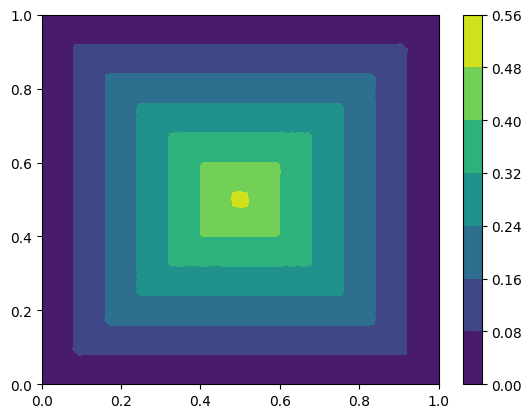

In [42]:
fig, ax = plt.subplots()
v = tricontourf(u, axes=ax)
fig.colorbar(v)